## Data Breach Analytics 2005 - 2017 (Part IV - Supervised Text Classification Modeling part 2 non text features)
#### by Miriam Rodriguez

Classification models need to be created to determine the risk of a data breach:
- the liklihood of a specific type of breach
- which organization type is likely to be hit
- what is the trend

Separate the features to predict each type of breach and which organizations

Organizations could develop security systems as a result of this study.


scoring dataset : breach_scoringdataset.csv

# Importing packages 

In [206]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

#import decisiontreeclassifier
from sklearn import tree
from sklearn.tree import DecisionTreeClassifier
#import logisticregression classifier
from sklearn.linear_model import LogisticRegression
import statsmodels.api as sm
#import knn classifier
from sklearn.neighbors import KNeighborsClassifier

#for validating your classification model
from sklearn.cross_validation import train_test_split
from sklearn.cross_validation import cross_val_score
from sklearn import metrics
from sklearn.metrics import roc_curve, auc
from pandas.core import datetools

# feature selection
from sklearn.feature_selection import RFE
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2

## Read cleaned data

In [207]:
#import breach data ... open or read the bank data
df=pd.read_csv("databreach_cleaned.csv")
print df.head()


   Breach_Year                                         Company          State  \
0         2006                       Deloitte & Touche, McAfee  United States   
1         2007                   TennCare, Americhoice Inc.     United States   
2         2007                      Mercer Health and Benefits  United States   
3         2007  Fidelity Investments, Dairy Farmers of America  United States   
4         2007                                      Dai Nippon  United States   

  Breach_Type Organization_Type  Total_Recs  \
0        PORT               BSO        9290   
1        PORT               MED       67000   
2        PORT               BSF       10500   
3        PORT               BSF          69   
4        INSD               BSO           0   

                                         Description   Latitude  Longitude  \
0  An external auditor lost a CD with names, Soci...  37.090240 -95.712891   
1  There are 67,000 TennCare \r\n            enro...  35.960638 -83.920739

# Data Prep

In [208]:
#drop or remove the column 'id' since this column is not used in the analysis and disply the result
df_stat = df.drop(['GDP', 'Latitude', 'Longitude', 'Breach_Type', 'Organization_Type', 'State', 'Company', 'Description', 'Year_CAT'], axis=1)
df_stat.head()


,Breach_Year,Total_Recs,Breach_Type_CAT,Organization_Type_CAT,State_CAT
0,2006,9290,5,2,0
1,2007,67000,5,6,0
2,2007,10500,5,1,0
3,2007,69,5,1,0
4,2007,0,3,2,0


In [209]:
#  Convert Total Records either harm (>1) or no harm (0) in terms of records breached.

df_stat["Total_Recs"][df_stat["Total_Recs"]>0] = 1
df_stat.head()


,Breach_Year,Total_Recs,Breach_Type_CAT,Organization_Type_CAT,State_CAT
0,2006,1,5,2,0
1,2007,1,5,6,0
2,2007,1,5,1,0
3,2007,1,5,1,0
4,2007,0,3,2,0


In [210]:
#describe the data

df_stat.describe()


,Breach_Year,Total_Recs,Breach_Type_CAT,Organization_Type_CAT,State_CAT
count,8177.000000,8177.000000,8177.000000,8177.000000,8177.000000
mean,2012.204965,0.728996,4.015042,4.534915,23.191513
std,3.425944,0.444505,1.992745,1.825506,15.301632
min,2005.000000,0.000000,0.000000,1.000000,0.000000
25%,2010.000000,0.000000,2.000000,3.000000,9.000000
50%,2012.000000,1.000000,4.000000,6.000000,21.000000
75%,2015.000000,1.000000,5.000000,6.000000,36.000000
max,2018.000000,1.000000,7.000000,7.000000,52.000000


In [211]:
#show the information about the dataset
df_stat.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8177 entries, 0 to 8176
Data columns (total 5 columns):
Breach_Year              8177 non-null int64
Total_Recs               8177 non-null int64
Breach_Type_CAT          8177 non-null int64
Organization_Type_CAT    8177 non-null int64
State_CAT                8177 non-null int64
dtypes: int64(5)
memory usage: 319.5 KB


# Classification Model building

In [212]:
#set X, y value
y = df_stat['Total_Recs']
X = df_stat.drop(['Total_Recs'], axis=1)

## Decision Tree Model Building, Validation, Evaluation


In [213]:
# evaluate the model by splitting into train (70%) and test sets (30%)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)
dt = DecisionTreeClassifier()
dt.fit(X_train, y_train)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')

In [214]:
#Model evaluation

print  metrics.accuracy_score(y_test, dt.predict(X_test))
print  metrics.confusion_matrix(y_test, dt.predict(X_test))
print  metrics.classification_report(y_test, dt.predict(X_test))
print  metrics.roc_auc_score(y_test, dt.predict(X_test))

0.744906275469
[[ 353  319]
 [ 307 1475]]
             precision    recall  f1-score   support

          0       0.53      0.53      0.53       672
          1       0.82      0.83      0.82      1782

avg / total       0.74      0.74      0.74      2454

0.676509640051


Question: Interpret the results of confusion matrix
    
- The decision tree model is 74% accurate. Therefore, we expect that the model will be about 74% accurate when the model is applied into a real-world situation 
- 355 incidents were correctly classified as not causing harm, 319 incidents were misclassified as not causing harm.
- 1463 incidents were correctly classified as causing harm, 317 incidents were misclassified as causing harm.
- Total number in testing dataset is 2454, total harm = 672 (355 + 317), total with no harm = 1782 (319 + 1463). 
- Overall accuracy calculated as correctly classified 355 + 1463 / 2454 total in test dsn = 74%

In [215]:
Breach_Type_dm = pd.get_dummies(df_stat['Breach_Type_CAT'], prefix='Breach_Type')
df_stat_sp = df_stat.join(Breach_Type_dm)
df_stat_sp.head()

,Breach_Year,Total_Recs,Breach_Type_CAT,Organization_Type_CAT,State_CAT,Breach_Type_0,Breach_Type_1,Breach_Type_2,Breach_Type_3,Breach_Type_4,Breach_Type_5,Breach_Type_6,Breach_Type_7
0,2006,1,5,2,0,0,0,0,0,0,1,0,0
1,2007,1,5,6,0,0,0,0,0,0,1,0,0
2,2007,1,5,1,0,0,0,0,0,0,1,0,0
3,2007,1,5,1,0,0,0,0,0,0,1,0,0
4,2007,0,3,2,0,0,0,0,1,0,0,0,0


In [216]:
df_stat_sp = df_stat_sp.drop(['Breach_Type_0'], axis=1)
df_stat_sp.head()

,Breach_Year,Total_Recs,Breach_Type_CAT,Organization_Type_CAT,State_CAT,Breach_Type_1,Breach_Type_2,Breach_Type_3,Breach_Type_4,Breach_Type_5,Breach_Type_6,Breach_Type_7
0,2006,1,5,2,0,0,0,0,0,1,0,0
1,2007,1,5,6,0,0,0,0,0,1,0,0
2,2007,1,5,1,0,0,0,0,0,1,0,0
3,2007,1,5,1,0,0,0,0,0,1,0,0
4,2007,0,3,2,0,0,0,1,0,0,0,0


In [217]:
# rename columns Description of incident: Description
df_stat_sp = df_stat_sp.rename(columns={'Breach_Type_1': 'CreditCard', 'Breach_Type_2': 'Hacking', 'Breach_Type_3': 'Insider', 'Breach_Type_4': 'Physical', 'Breach_Type_5': 'Portable', 'Breach_Type_6': 'Stationary', 'Breach_Type_6': 'Disclosure', 'Breach_Type_7': 'Unknown'})

In [218]:
df_stat_sp.head()

,Breach_Year,Total_Recs,Breach_Type_CAT,Organization_Type_CAT,State_CAT,CreditCard,Hacking,Insider,Physical,Portable,Disclosure,Unknown
0,2006,1,5,2,0,0,0,0,0,1,0,0
1,2007,1,5,6,0,0,0,0,0,1,0,0
2,2007,1,5,1,0,0,0,0,0,1,0,0
3,2007,1,5,1,0,0,0,0,0,1,0,0
4,2007,0,3,2,0,0,0,1,0,0,0,0


In [219]:
df_stat_sp = df_stat_sp.drop(['Breach_Type_CAT'], axis=1)
df_stat_sp.head()

,Breach_Year,Total_Recs,Organization_Type_CAT,State_CAT,CreditCard,Hacking,Insider,Physical,Portable,Disclosure,Unknown
0,2006,1,2,0,0,0,0,0,1,0,0
1,2007,1,6,0,0,0,0,0,1,0,0
2,2007,1,1,0,0,0,0,0,1,0,0
3,2007,1,1,0,0,0,0,0,1,0,0
4,2007,0,2,0,0,0,1,0,0,0,0


## Model Creation and Deployment: Predict y values using the decision tree classifiers.
- Create and load scoringdataset.csv (scoring dataset). This dataset has no y value, representing the future. Decision model will be deployed to determine if we can predict the type of breach.

In [220]:
#set X, y value
y = df_stat_sp['Hacking']
X = df_stat_sp.drop(['Hacking'], axis=1)

In [221]:
# evaluate the model by splitting into train (70%) and test sets (30%)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)
dt = DecisionTreeClassifier()
dt.fit(X_train, y_train)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')

In [222]:
#Model evaluation

print  metrics.accuracy_score(y_test, dt.predict(X_test))
print  metrics.confusion_matrix(y_test, dt.predict(X_test))
print  metrics.classification_report(y_test, dt.predict(X_test))
print  metrics.roc_auc_score(y_test, dt.predict(X_test))

0.953952730236
[[1660   48]
 [  65  681]]
             precision    recall  f1-score   support

          0       0.96      0.97      0.97      1708
          1       0.93      0.91      0.92       746

avg / total       0.95      0.95      0.95      2454

0.942382794106


#### Model Deployment

In [223]:
df_score_h = df_stat_sp.drop(['Hacking'], axis=1)
df_score_h.head()

,Breach_Year,Total_Recs,Organization_Type_CAT,State_CAT,CreditCard,Insider,Physical,Portable,Disclosure,Unknown
0,2006,1,2,0,0,0,0,1,0,0
1,2007,1,6,0,0,0,0,1,0,0
2,2007,1,1,0,0,0,0,1,0,0
3,2007,1,1,0,0,0,0,1,0,0
4,2007,0,2,0,0,1,0,0,0,0


In [224]:
df_score_h.to_csv("scoringdataset_hack.csv",index=False)

In [225]:
# load scoringdataset_hack.csv
score_h=pd.read_csv("scoringdataset_hack.csv")
print score_h.head()

   Breach_Year  Total_Recs  Organization_Type_CAT  State_CAT  CreditCard  \
0         2006           1                      2          0           0   
1         2007           1                      6          0           0   
2         2007           1                      1          0           0   
3         2007           1                      1          0           0   
4         2007           0                      2          0           0   

   Insider  Physical  Portable  Disclosure  Unknown  
0        0         0         1           0        0  
1        0         0         1           0        0  
2        0         0         1           0        0  
3        0         0         1           0        0  
4        1         0         0           0        0  


In [226]:
# finally generate the predicted y value
predictedY = dt.predict(score_h)
print predictedY

[0 0 0 ..., 1 0 0]


In [227]:
predictedY = pd.DataFrame(predictedY, columns=['predicted Y'])
predictedY.head(20)

,predicted Y
0,0
1,0
2,0
3,0
4,0
5,0
6,0
7,0
8,1
9,0


In [228]:
# Check hacking column to see if matches predicted Y
df_stat_sp.head(20)

,Breach_Year,Total_Recs,Organization_Type_CAT,State_CAT,CreditCard,Hacking,Insider,Physical,Portable,Disclosure,Unknown
0,2006,1,2,0,0,0,0,0,1,0,0
1,2007,1,6,0,0,0,0,0,1,0,0
2,2007,1,1,0,0,0,0,0,1,0,0
3,2007,1,1,0,0,0,0,0,1,0,0
4,2007,0,2,0,0,0,1,0,0,0,0
5,2007,1,6,0,0,0,0,0,0,0,1
6,2008,0,2,0,0,0,0,0,1,0,0
7,2009,0,5,0,0,0,0,1,0,0,0
8,2009,1,4,0,0,1,0,0,0,0,0
9,2010,1,6,0,0,0,0,1,0,0,0


In [229]:
data_h = score_h.join(predictedY) 
data_h.head(20)

,Breach_Year,Total_Recs,Organization_Type_CAT,State_CAT,CreditCard,Insider,Physical,Portable,Disclosure,Unknown,predicted Y
0,2006,1,2,0,0,0,0,1,0,0,0
1,2007,1,6,0,0,0,0,1,0,0,0
2,2007,1,1,0,0,0,0,1,0,0,0
3,2007,1,1,0,0,0,0,1,0,0,0
4,2007,0,2,0,0,1,0,0,0,0,0
5,2007,1,6,0,0,0,0,0,0,1,0
6,2008,0,2,0,0,0,0,1,0,0,0
7,2009,0,5,0,0,0,1,0,0,0,0
8,2009,1,4,0,0,0,0,0,0,0,1
9,2010,1,6,0,0,0,1,0,0,0,0


### Hacking was predicted correctly

#### Model Create

In [230]:
#set X, y value
y = df_stat_sp['CreditCard']
X = df_stat_sp.drop(['CreditCard'], axis=1)

In [231]:
# evaluate the model by splitting into train (70%) and test sets (30%)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)
dt = DecisionTreeClassifier()
dt.fit(X_train, y_train)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')

In [232]:
#Model evaluation

print  metrics.accuracy_score(y_test, dt.predict(X_test))
print  metrics.confusion_matrix(y_test, dt.predict(X_test))
print  metrics.classification_report(y_test, dt.predict(X_test))
print  metrics.roc_auc_score(y_test, dt.predict(X_test))

0.99185004075
[[2425   11]
 [   9    9]]
             precision    recall  f1-score   support

          0       1.00      1.00      1.00      2436
          1       0.45      0.50      0.47        18

avg / total       0.99      0.99      0.99      2454

0.747742200328


#### Model Deployment

In [233]:
df_score_cc = df_stat_sp.drop(['CreditCard'], axis=1)
df_score_cc.head()

,Breach_Year,Total_Recs,Organization_Type_CAT,State_CAT,Hacking,Insider,Physical,Portable,Disclosure,Unknown
0,2006,1,2,0,0,0,0,1,0,0
1,2007,1,6,0,0,0,0,1,0,0
2,2007,1,1,0,0,0,0,1,0,0
3,2007,1,1,0,0,0,0,1,0,0
4,2007,0,2,0,0,1,0,0,0,0


In [234]:
df_score_cc.to_csv("scoringdataset_card.csv",index=False)

In [235]:
# load scoringdataset_card.csv
score_cc=pd.read_csv("scoringdataset_card.csv")
print score_cc.head()

   Breach_Year  Total_Recs  Organization_Type_CAT  State_CAT  Hacking  \
0         2006           1                      2          0        0   
1         2007           1                      6          0        0   
2         2007           1                      1          0        0   
3         2007           1                      1          0        0   
4         2007           0                      2          0        0   

   Insider  Physical  Portable  Disclosure  Unknown  
0        0         0         1           0        0  
1        0         0         1           0        0  
2        0         0         1           0        0  
3        0         0         1           0        0  
4        1         0         0           0        0  


In [236]:
# finally generate the predicted y value
predictedY = dt.predict(score_cc)
predictedY

array([0, 0, 0, ..., 0, 0, 0], dtype=uint8)

In [237]:
predictedY = pd.DataFrame(predictedY, columns=['predicted Y'])
predictedY.head(20)

,predicted Y
0,0
1,0
2,0
3,0
4,0
5,0
6,0
7,0
8,0
9,0


In [238]:
data_cc = score_cc.join(predictedY) 
data_cc.head(20)

,Breach_Year,Total_Recs,Organization_Type_CAT,State_CAT,Hacking,Insider,Physical,Portable,Disclosure,Unknown,predicted Y
0,2006,1,2,0,0,0,0,1,0,0,0
1,2007,1,6,0,0,0,0,1,0,0,0
2,2007,1,1,0,0,0,0,1,0,0,0
3,2007,1,1,0,0,0,0,1,0,0,0
4,2007,0,2,0,0,1,0,0,0,0,0
5,2007,1,6,0,0,0,0,0,0,1,0
6,2008,0,2,0,0,0,0,1,0,0,0
7,2009,0,5,0,0,0,1,0,0,0,0
8,2009,1,4,0,1,0,0,0,0,0,0
9,2010,1,6,0,0,0,1,0,0,0,0


In [239]:
# Check credit card column to see if matches predicted Y
df_stat_sp.head(20)

,Breach_Year,Total_Recs,Organization_Type_CAT,State_CAT,CreditCard,Hacking,Insider,Physical,Portable,Disclosure,Unknown
0,2006,1,2,0,0,0,0,0,1,0,0
1,2007,1,6,0,0,0,0,0,1,0,0
2,2007,1,1,0,0,0,0,0,1,0,0
3,2007,1,1,0,0,0,0,0,1,0,0
4,2007,0,2,0,0,0,1,0,0,0,0
5,2007,1,6,0,0,0,0,0,0,0,1
6,2008,0,2,0,0,0,0,0,1,0,0
7,2009,0,5,0,0,0,0,1,0,0,0
8,2009,1,4,0,0,1,0,0,0,0,0
9,2010,1,6,0,0,0,0,1,0,0,0


### Credit Card was predicted correctly


#### Model Creation

In [240]:
#set X, y value
y = df_stat_sp['Disclosure']
X = df_stat_sp.drop(['Disclosure'], axis=1)

In [241]:
# evaluate the model by splitting into train (70%) and test sets (30%)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)
dt = DecisionTreeClassifier()
dt.fit(X_train, y_train)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')

In [242]:
#Model evaluation

print  metrics.accuracy_score(y_test, dt.predict(X_test))
print  metrics.confusion_matrix(y_test, dt.predict(X_test))
print  metrics.classification_report(y_test, dt.predict(X_test))
print  metrics.roc_auc_score(y_test, dt.predict(X_test))

0.977587612062
[[2351   30]
 [  25   48]]
             precision    recall  f1-score   support

          0       0.99      0.99      0.99      2381
          1       0.62      0.66      0.64        73

avg / total       0.98      0.98      0.98      2454

0.822467249285


#### Model Deployment

In [243]:
df_score_d = df_stat_sp.drop(['Disclosure'], axis=1)
df_score_d.head()

,Breach_Year,Total_Recs,Organization_Type_CAT,State_CAT,CreditCard,Hacking,Insider,Physical,Portable,Unknown
0,2006,1,2,0,0,0,0,0,1,0
1,2007,1,6,0,0,0,0,0,1,0
2,2007,1,1,0,0,0,0,0,1,0
3,2007,1,1,0,0,0,0,0,1,0
4,2007,0,2,0,0,0,1,0,0,0


In [244]:
df_score_d.to_csv("scoringdataset_disc.csv",index=False)

In [245]:
# load scoringdataset_card.csv
score_d=pd.read_csv("scoringdataset_disc.csv")
print score_d.head()

   Breach_Year  Total_Recs  Organization_Type_CAT  State_CAT  CreditCard  \
0         2006           1                      2          0           0   
1         2007           1                      6          0           0   
2         2007           1                      1          0           0   
3         2007           1                      1          0           0   
4         2007           0                      2          0           0   

   Hacking  Insider  Physical  Portable  Unknown  
0        0        0         0         1        0  
1        0        0         0         1        0  
2        0        0         0         1        0  
3        0        0         0         1        0  
4        0        1         0         0        0  


In [246]:
# finally generate the predicted y value
predictedY = dt.predict(score_d)
predictedY

array([0, 0, 0, ..., 0, 0, 0], dtype=uint8)

In [247]:
predictedY = pd.DataFrame(predictedY, columns=['predicted Y'])
predictedY.head(20)

,predicted Y
0,0
1,0
2,0
3,0
4,0
5,0
6,0
7,0
8,0
9,0


### Disclosure was predicted correctly for first 20


In [248]:
# Check credit card column to see if matches predicted Y
df_stat_sp.head(20)

,Breach_Year,Total_Recs,Organization_Type_CAT,State_CAT,CreditCard,Hacking,Insider,Physical,Portable,Disclosure,Unknown
0,2006,1,2,0,0,0,0,0,1,0,0
1,2007,1,6,0,0,0,0,0,1,0,0
2,2007,1,1,0,0,0,0,0,1,0,0
3,2007,1,1,0,0,0,0,0,1,0,0
4,2007,0,2,0,0,0,1,0,0,0,0
5,2007,1,6,0,0,0,0,0,0,0,1
6,2008,0,2,0,0,0,0,0,1,0,0
7,2009,0,5,0,0,0,0,1,0,0,0
8,2009,1,4,0,0,1,0,0,0,0,0
9,2010,1,6,0,0,0,0,1,0,0,0


In [249]:
data_d = score_d.join(predictedY) 
data_d.head(20)

,Breach_Year,Total_Recs,Organization_Type_CAT,State_CAT,CreditCard,Hacking,Insider,Physical,Portable,Unknown,predicted Y
0,2006,1,2,0,0,0,0,0,1,0,0
1,2007,1,6,0,0,0,0,0,1,0,0
2,2007,1,1,0,0,0,0,0,1,0,0
3,2007,1,1,0,0,0,0,0,1,0,0
4,2007,0,2,0,0,0,1,0,0,0,0
5,2007,1,6,0,0,0,0,0,0,1,0
6,2008,0,2,0,0,0,0,0,1,0,0
7,2009,0,5,0,0,0,0,1,0,0,0
8,2009,1,4,0,0,1,0,0,0,0,0
9,2010,1,6,0,0,0,0,1,0,0,0


In [250]:
Org_Type_dm = pd.get_dummies(df_stat['Organization_Type_CAT'], prefix='Org_Type')
df_stat_or = df_stat.join(Org_Type_dm)
df_stat_or.head()

,Breach_Year,Total_Recs,Breach_Type_CAT,Organization_Type_CAT,State_CAT,Org_Type_1,Org_Type_2,Org_Type_3,Org_Type_4,Org_Type_5,Org_Type_6,Org_Type_7
0,2006,1,5,2,0,0,1,0,0,0,0,0
1,2007,1,5,6,0,0,0,0,0,0,1,0
2,2007,1,5,1,0,1,0,0,0,0,0,0
3,2007,1,5,1,0,1,0,0,0,0,0,0
4,2007,0,3,2,0,0,1,0,0,0,0,0


> # Logistic Regression
- For logistic regression & logit, you should create dummy variables for categorical columns (e.g., sex)
- When declaring X and y, use different names such as X_lr and y_lr not to overwrite X and y since you will use X and y for knn and other algorithms (e.g., random forest, extratreeclassifier)
- Make sure to drop one column (e.g., sex_0) for each categorical column when declaring X_lr

In [251]:
print df_stat_sp.dtypes

Breach_Year              int64
Total_Recs               int64
Organization_Type_CAT    int64
State_CAT                int64
CreditCard               uint8
Hacking                  uint8
Insider                  uint8
Physical                 uint8
Portable                 uint8
Disclosure               uint8
Unknown                  uint8
dtype: object


In [252]:
# correlation analysis & heatmap
print df_stat_sp.corr()

                       Breach_Year  Total_Recs  Organization_Type_CAT  \
Breach_Year               1.000000   -0.030102               0.188673   
Total_Recs               -0.030102    1.000000               0.383814   
Organization_Type_CAT     0.188673    0.383814               1.000000   
State_CAT                -0.066180    0.077331               0.047470   
CreditCard               -0.032603   -0.053239              -0.113151   
Hacking                   0.255300   -0.169267              -0.216258   
Insider                  -0.087134   -0.069123              -0.052762   
Physical                  0.014403    0.129257               0.262098   
Portable                 -0.291596    0.015403              -0.046445   
Disclosure               -0.157075    0.003971              -0.008264   
Unknown                   0.097471    0.099411               0.089716   

                       State_CAT  CreditCard   Hacking   Insider  Physical  \
Breach_Year            -0.066180   -0.032603 

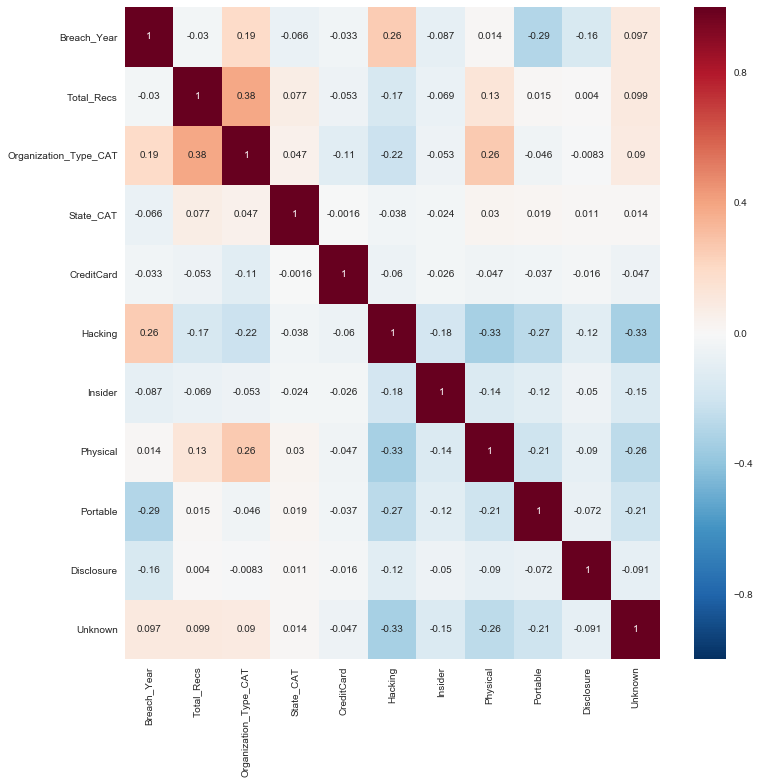

In [254]:
plt.figure(figsize=(12,12))
sns.heatmap(df_stat_sp.corr(), annot=True)

What are the findings from correlation analysis?
- The higher values seem to occur with hacking breaches.
- Hacking and unknown have a negative correlation.
- Physical breaches are also among the higher scores.
- For the most part the correlation scores appear to be low.

In [255]:
# declaring X_lr, y_lr (instead of X and y). We don't want to overwrite X and y
y_lr = df_stat_sp['Hacking']
X_lr = df_stat_sp.drop(['Hacking'], axis=1)

In [256]:
X_lr.head(2)

,Breach_Year,Total_Recs,Organization_Type_CAT,State_CAT,CreditCard,Insider,Physical,Portable,Disclosure,Unknown
0,2006,1,2,0,0,0,0,1,0,0
1,2007,1,6,0,0,0,0,1,0,0


In [257]:
# evaluate the model by splitting into train and test sets (split validation) 70%/30%

X_train, X_test, y_train, y_test = train_test_split(X_lr, y_lr, test_size=0.3, random_state=0)
lr = LogisticRegression()
lr.fit(X_train, y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

In [258]:
#Split valuation. 
#Report the following model evaluation metrics: overall model accuracy, confusion matrix, AUC score, classification report
print  metrics.accuracy_score(y_test, lr.predict(X_test))
print  metrics.confusion_matrix(y_test, lr.predict(X_test))
print  metrics.classification_report(y_test, lr.predict(X_test))
print  metrics.roc_auc_score(y_test, lr.predict(X_test))

0.969845150774
[[1634   74]
 [   0  746]]
             precision    recall  f1-score   support

          0       1.00      0.96      0.98      1708
          1       0.91      1.00      0.95       746

avg / total       0.97      0.97      0.97      2454

0.978337236534


**96.98% model accuracy**
- **0.97 AUC score; AUC = Area Under Curve**
    - TPR = (true positives/total positives) = / =  
    - FPR = (false positives/total negatives) = / =  

In [259]:
# evaluate the decision tree model for hacking using 10-fold cross-validation
cross_scores_h = cross_val_score(lr, X_lr, y_lr, scoring='accuracy', cv=10)
print cross_scores_h
print cross_scores_h.mean()

[ 0.96336996  0.96699267  0.96821516  0.96332518  0.96943765  0.96210269
  0.97674419  0.97307222  0.97062424  0.97429621]
0.968818015511


> # Logit Model

not significant:
very significant: TBD

> 

In [176]:
# logit pred_table()
model_logit.predict()

array([ 0.62865555,  0.41102001,  0.26851517,  0.31844923,  0.6079634 ,
        0.36688012,  0.62511028,  0.36868691,  0.41501033,  0.28569092,
        0.67237089,  0.54106259,  0.18482564,  0.53386373,  0.29805442,
        0.2798791 ,  0.29548358,  0.45437503,  0.37199005,  0.34974812,
        0.6563281 ,  0.22854959,  0.53869582,  0.40447365,  0.41640969,
        0.511813  ,  0.31588465,  0.39346352,  0.60612257,  0.50381669,
        0.24856013,  0.19924289,  0.32462077,  0.50388   ,  0.72992753,
        0.23566255,  0.17445635,  0.6103005 ,  0.2653568 ,  0.63803607,
        0.50929402,  0.5264332 ,  0.79687511,  0.46145853,  0.38126761,
        0.54982032,  0.40702877,  0.37836813,  0.80840413,  0.21451032,
        0.41587399,  0.5389855 ,  0.2599646 ,  0.62036042,  0.65101379,
        0.67700859,  0.72599436,  0.38481826,  0.41192594,  0.54179973,
        0.26876465,  0.77912291,  0.33852848,  0.28684062,  0.35359468,
        0.32742361,  0.37939213,  0.60729645,  0.46466116,  0.28

In [179]:
model_logit.pred_table()

array([[ 231.,   95.],
       [ 124.,  150.]])

Interpret the accuracy based on the pred_table

- The model accuracy is (231 + 150) / 600 = 0.635
- Income appears to be the main predictor


In [180]:
# look at the confidence interval of each coeffecient
print model_logit.conf_int()

                      0         1
age           -0.016389  0.014951
region        -0.165234  0.096677
income         0.000021  0.000063
children      -0.335197 -0.015410
sex_1         -0.109966  0.551781
married_1     -1.284606 -0.592615
car_1         -0.358371  0.316887
save_act_1    -1.048580 -0.290761
current_act_1 -0.390004  0.325972
mortgage_1    -0.547780  0.159328


The only positive value is income. The customer's income level, married or not and savings account are the predictors of whether a PEP is purchased.

In [181]:
# odds ratios only
print np.exp(model_logit.params)

age              0.999281
region           0.966303
income           1.000042
children         0.839203
sex_1            1.247208
married_1        0.391171
car_1            0.979472
save_act_1       0.511877
current_act_1    0.968491
mortgage_1       0.823472
dtype: float64


> Interpret the odd ratios

- If Income of a customer increases, 100% chance will purchase a PEP.
- Men are more likely to purchase a PEP.

- Interpret the odd ratio of save_act_1 - Having a savings account has slightly more of a chance of purchasing of buying a PEP over those who do not.

- Interpret the odd ratio of married_1 - If a customer is married, there is 39% chance of buying a PEP. More likely, one who is not married has a stronger possibility of buying a PEP.

> # K-nearest Neighbors (knn)
- You should choose the best k value first.

Text(0,0.5,'accuracy')

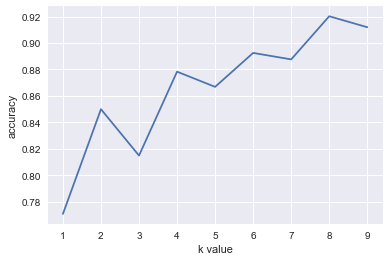

In [266]:
# search for an optimal value of K
k_range = range(1, 10)
scores = []
for k in k_range:
    knn = KNeighborsClassifier(n_neighbors=k)
    scores.append(np.mean(cross_val_score(knn, X, y, cv=10, scoring='accuracy')))

# plot the K values (x-axis) versus the 10-fold CV score (y-axis)
plt.figure()
plt.plot(k_range, scores)
plt.xlabel('k value')
plt.ylabel('accuracy')



# what is the optimal k value? Per below it is 9

C:\Users\DOUGR\Anaconda2\lib\site-packages\sklearn\grid_search.py:42: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. This module will be removed in 0.20.
  DeprecationWarning)


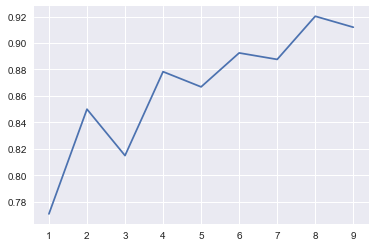

In [267]:

# automatic grid search for an optimal value of K
#http://scikit-learn.org/stable/modules/generated/sklearn.grid_search.GridSearchCV.html

from sklearn.grid_search import GridSearchCV

knn = KNeighborsClassifier()
k_range = range(1, 10)
param_grid = dict(n_neighbors=k_range)
grid = GridSearchCV(knn, param_grid, cv=10, scoring='accuracy')
grid.fit(X, y)

# check the results of the grid search
grid.grid_scores_
grid_mean_scores = [result[1] for result in grid.grid_scores_]
plt.figure()
plt.plot(k_range, grid_mean_scores)
plt.show()


In [268]:
print grid.best_score_
print grid.best_params_
print grid.best_estimator_

0.920264155558
{'n_neighbors': 8}
KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=8, p=2,
           weights='uniform')


In [269]:
# evaluate the model by splitting into train and test sets & develop knn model (name it as knn). 
# Use the optimal k value
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)
knn = KNeighborsClassifier(n_neighbors=9)
knn.fit(X_train, y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=9, p=2,
           weights='uniform')

In [270]:
#Model evaluation without valdation
print  metrics.accuracy_score(y_test, knn.predict(X_test))
print  metrics.confusion_matrix(y_test, knn.predict(X_test))
print  metrics.classification_report(y_test, knn.predict(X_test))
print  metrics.roc_auc_score(y_test, knn.predict(X_test))

0.969845150774
[[2379    2]
 [  72    1]]
             precision    recall  f1-score   support

          0       0.97      1.00      0.98      2381
          1       0.33      0.01      0.03        73

avg / total       0.95      0.97      0.96      2454

0.506429323468


In [271]:
# evaluate the decision tree model using 10-fold cross-validation
scores = cross_val_score(knn, X, y, scoring='accuracy', cv=10)
print scores
print scores.mean()

[ 0.73105134  0.89608802  0.96943765  0.96943765  0.96943765  0.85330073
  0.88997555  0.90220049  0.96817625  0.97058824]
0.911969358524


> # Random Forest

In [272]:
# develop a random forest model
from sklearn.ensemble import RandomForestClassifier

clf = RandomForestClassifier(n_estimators=20)    #building 20 decision trees
clf=clf.fit(X, y)
clf.score(X,y)

0.99559740736211322

In [273]:
# generate evaluation metrics
print metrics.accuracy_score(y, clf.predict(X)) #overall accuracy
print metrics.confusion_matrix(y, clf.predict(X))
print metrics.classification_report(y, clf.predict(X))

0.995597407362
[[7911   17]
 [  19  230]]
             precision    recall  f1-score   support

          0       1.00      1.00      1.00      7928
          1       0.93      0.92      0.93       249

avg / total       1.00      1.00      1.00      8177



In [274]:
print "Features sorted by their rank:"
print sorted(zip(map(lambda x: round(x, 4), clf.feature_importances_), X.columns))

Features sorted by their rank:
[(0.022, 'CreditCard'), (0.0245, 'Total_Recs'), (0.0624, 'Unknown'), (0.0763, 'Hacking'), (0.0825, 'Organization_Type_CAT'), (0.0839, 'Physical'), (0.1304, 'Portable'), (0.1372, 'Breach_Year'), (0.1397, 'Insider'), (0.2412, 'State_CAT')]


In [275]:
# another method
pd.DataFrame({'feature':X.columns, 'importance':clf.feature_importances_})

,feature,importance
0,Breach_Year,0.137205
1,Total_Recs,0.024464
2,Organization_Type_CAT,0.082473
3,State_CAT,0.241248
4,CreditCard,0.021952
5,Hacking,0.076287
6,Insider,0.139661
7,Physical,0.083891
8,Portable,0.130400
9,Unknown,0.062418


In [276]:
#Predict class probabilities for X
clf.predict_proba(X)
# 1st value: the probability of not hacking
# 2nd value: the probability of hacking 

array([[ 1.,  0.],
       [ 1.,  0.],
       [ 1.,  0.],
       ..., 
       [ 1.,  0.],
       [ 1.,  0.],
       [ 1.,  0.]])

> # Feature Selection

> # 1. SelectKBest & Decision Tree
- Run SelectKBest and develop a decision tree based on the results of SelectKBest
- use k = 4

In [277]:
# SelectKBest
X_new = SelectKBest(chi2, k=4).fit_transform(X, y)
print X_new

[[0 0 1 0]
 [0 0 1 0]
 [0 0 1 0]
 ..., 
 [1 0 0 0]
 [0 0 0 1]
 [0 0 0 1]]


In [279]:
X.head(5)
# best predictors are '' '' '' ''

,Breach_Year,Total_Recs,Organization_Type_CAT,State_CAT,CreditCard,Hacking,Insider,Physical,Portable,Unknown
0,2006,1,2,0,0,0,0,0,1,0
1,2007,1,6,0,0,0,0,0,1,0
2,2007,1,1,0,0,0,0,0,1,0
3,2007,1,1,0,0,0,0,0,1,0
4,2007,0,2,0,0,0,1,0,0,0


In [280]:
X_train, X_test, y_train, y_test = train_test_split(X_new, y, test_size=0.3, random_state=0)
dt_model = DecisionTreeClassifier(max_depth=4, min_samples_leaf=5)
dt_model.fit(X_train, y_train)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=4,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=5, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')

In [281]:
# build a decision tree model with those 4 variables 
# evaluate the model by splitting into train (70%) and test sets (30%)
X_train, X_test, y_train, y_test = train_test_split(X_new, y, test_size=0.3, random_state=0)
dt_model = tree.DecisionTreeClassifier(max_depth=4, min_samples_leaf=5)
dt_model.fit(X_train, y_train)

#dt = tree.DecisionTreeClassifier(criterion='entropy', max_depth=4,min_samples_leaf=5)
#dt_simple = DecisionTreeClassifier(max_depth=5, min_samples_leaf=5)


#Model evaluation
print metrics.accuracy_score(y_test, dt_model.predict(X_test))
print "--------------------------------------------------------"
print metrics.confusion_matrix(y_test, dt_model.predict(X_test)) 
print "--------------------------------------------------------"
print metrics.classification_report(y_test, dt_model.predict(X_test))
print "--------------------------------------------------------"
print metrics.roc_auc_score(y_test, dt_model.predict(X_test))

0.970252648737
--------------------------------------------------------
[[2381    0]
 [  73    0]]
--------------------------------------------------------
             precision    recall  f1-score   support

          0       0.97      1.00      0.98      2381
          1       0.00      0.00      0.00        73

avg / total       0.94      0.97      0.96      2454

--------------------------------------------------------
0.5


C:\Users\DOUGR\Anaconda2\lib\site-packages\sklearn\metrics\classification.py:1135: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


In [282]:
# visualize decision tree
X_new_df = pd.DataFrame(X_new)
X_new_df = X_new_df.rename(columns={0: 'Age', 1: 'Income', 2: 'Married', 3: 'Children'})
tree.export_graphviz(dt_model, out_file='data/decisiontree_m.dot', feature_names=X_new_df.columns)

In [283]:
# embed the decision tree
from IPython.display import Image
Image("decisiontree_m.png")

>> # RFE
- Run RFE with logistic regression model
- 3 highest ranking X variables

In [284]:
# build logisticRegression
model = LogisticRegression()
# selecting 3 highest ranking X variables
rfe = RFE(model, 3)  #asking three best attributes
rfe = rfe.fit(X, y)
# summarize the selection of the attributes
print(rfe.support_)
print(rfe.ranking_)




[False False False False False  True False  True False  True]
[8 5 6 7 4 1 3 1 2 1]


In [285]:
# Features sorted by their rank
pd.DataFrame({'feature':X.columns, 'importance':rfe.ranking_})

,feature,importance
0,Breach_Year,8
1,Total_Recs,5
2,Organization_Type_CAT,6
3,State_CAT,7
4,CreditCard,4
5,Hacking,1
6,Insider,3
7,Physical,1
8,Portable,2
9,Unknown,1


In [286]:
print "Features sorted by their rank:"
print sorted(zip(map(lambda x: x, rfe.ranking_), X.columns))

Features sorted by their rank:
[(1, 'Hacking'), (1, 'Physical'), (1, 'Unknown'), (2, 'Portable'), (3, 'Insider'), (4, 'CreditCard'), (5, 'Total_Recs'), (6, 'Organization_Type_CAT'), (7, 'State_CAT'), (8, 'Breach_Year')]


In [292]:
#select most significant features only 
X_logistic = df_stat_sp[['Hacking', 'Physical', 'Unknown', 'Portable', 'Insider']]
print X_logistic.head()

   Hacking  Physical  Unknown  Portable  Insider
0        0         0        0         1        0
1        0         0        0         1        0
2        0         0        0         1        0
3        0         0        0         1        0
4        0         0        0         0        1


In [293]:
X_train, X_test, y_train, y_test = train_test_split(X_logistic, y, test_size=0.3, random_state=0)
lr = LogisticRegression()
lr.fit(X_train, y_train)

#Model evaluation
print metrics.accuracy_score(y_test, lr.predict(X_test))
print metrics.confusion_matrix(y_test, lr.predict(X_test))
print metrics.classification_report(y_test, lr.predict(X_test))
print metrics.roc_auc_score(y_test, lr.predict(X_test))

0.970252648737
[[2381    0]
 [  73    0]]
             precision    recall  f1-score   support

          0       0.97      1.00      0.98      2381
          1       0.00      0.00      0.00        73

avg / total       0.94      0.97      0.96      2454

0.5


Logistic regression does not appear to work as well as other models.

>> # ExtraTreeClassifier

In [294]:
# build ExtraTreesClassifier
model_extra = ExtraTreesClassifier()
model_extra.fit(X, y)
model_extra.score(X, y)

# display the relative importance of each attribute
print(model_extra.feature_importances_)

[ 0.15271967  0.0220932   0.0718289   0.22404227  0.02270737  0.09696381
  0.0798377   0.10509947  0.06357264  0.16113497]


In [295]:
# What are 5 highest ranking X variables according to ExtraTreeClassifier?
print "Features sorted by their rank:"
print sorted(zip(map(lambda x: round(x, 5), model_extra.feature_importances_), X.columns))

Features sorted by their rank:
[(0.02209, 'Total_Recs'), (0.02271, 'CreditCard'), (0.06357, 'Portable'), (0.07183, 'Organization_Type_CAT'), (0.07984, 'Insider'), (0.09696, 'Hacking'), (0.1051, 'Physical'), (0.15272, 'Breach_Year'), (0.16113, 'Unknown'), (0.22404, 'State_CAT')]
